In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import networkx as nx

np.set_printoptions(formatter={'float': lambda x: "{0:0.8f}".format(x)})
conversion_metrics_csv = "conversion-metrics.csv"

In [202]:
df = pd.read_csv(conversion_metrics_csv)

In [3]:
df

,from,to,factor,factor_normalized
0,acres,ares,40.47,40.468564224
1,acres,hectares,0.40,0.404685642
2,acres,square feet,43560.00,43560.000000000
3,acres,square kilometers,0.00,0.004046856
4,acres,square meters,4046.86,4046.856422400
...,...,...,...,...
462,"yards, square",square centimeters,8361.27,8361.273600000
463,"yards, square",square feet,9.00,9.000000000
464,"yards, square",square inches,1296.00,1296.000000000
465,"yards, square",square meters,0.84,0.836127360


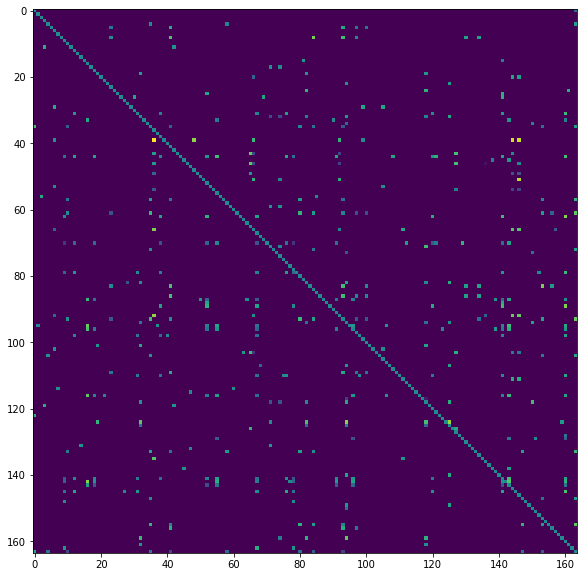

In [201]:
labels = list(set([*df['from'], *df['to']]))
M = np.identity(len(labels))
G = nx.DiGraph()

for label in labels:
    G.add_node(label)

for i, row in df.iterrows():
    row_index = labels.index(row['from'])
    col_index = labels.index(row['to'])
    try:
        M[row_index, col_index] = row['factor_normalized']
        M[col_index, row_index] = 1.0 / row['factor_normalized']
        G.add_edge(row['from'], row['to'], weight = row['factor_normalized'])
        G.add_edge(row['to'], row['from'], weight = 1.0 / row['factor_normalized'])
    except:
        pass
        
plt.figure(figsize=(10, 10))
plt.imshow(np.log(M + 0.0000001))

In [107]:
M_sparse = csr_matrix(M)
cc_n_components, cc_labels = connected_components(M_sparse)
(cc_n_components, cc_labels, len(cc_labels))

(12,
 array([ 0,  1,  2,  3,  0,  0,  4,  5,  0,  1,  0,  3,  1,  6,  4,  1,  1,
         4,  1,  4,  4,  1,  4,  0,  4,  1,  1,  1,  4,  4,  1,  1,  4,  1,
         4,  0,  4,  1,  1,  4,  1,  0,  3,  4,  1,  1,  4,  7,  4,  4,  1,
         4,  1,  4,  4,  1,  2,  0,  0,  4,  5,  0,  1,  4,  1,  4,  4,  1,
         4,  1,  1,  4,  0,  4,  4,  1,  1,  1,  1,  1,  0,  1,  4,  0,  0,
         2,  0,  1,  1,  1,  1,  1,  4,  0,  4,  1,  1,  0,  1,  4,  0,  4,
         4,  4,  0,  4,  1,  4,  1,  0,  1,  4,  1,  8,  5,  7,  1,  4,  4,
         3,  1,  1,  0,  1,  4,  4,  4,  4,  1,  1,  0,  4,  7,  0,  0,  4,
         4,  9,  1,  1,  4,  1,  1,  1,  4,  1,  4,  0,  1,  4,  4,  1,  1,
         0, 10,  0,  0,  4, 11,  4,  1,  4,  1,  0]),
 164)

Text(0.5, 1.0, 'Histogram of connected components (CC)')

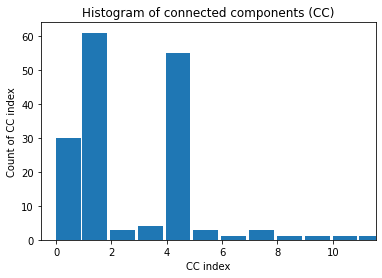

In [200]:
plt.hist(cc_labels, bins=len(cc_labels), width = 0.9)
plt.xlabel('CC index')
plt.ylabel('Count of CC index')
plt.title('Histogram of connected components (CC)')

In [204]:
node_colors = ['#c2c3c4'] * 12
node_colors[0] = '#d16d6d'
node_colors[1] = '#8ee673'
node_colors[4] = '#73a1e6'

In [110]:
df_cc = pd.DataFrame(data = {'labels': labels, 'component': cc_labels})
df_cc['node_color'] = [node_colors[row['component']] for _, row in df_cc.iterrows()]
df_cc

,labels,component,node_color
0,milligrams,0,#d16d6d
1,liquid quarts (British),1,#8ee673
2,cubic feet of permanently enclosed cargo space,2,#c2c3c4
3,cubic feet of permanently enclosed space,3,#c2c3c4
4,scruples,0,#d16d6d
...,...,...,...
159,furlongs,4,#73a1e6
160,cubic inches,1,#8ee673
161,fathoms,4,#73a1e6
162,cords of wood,1,#8ee673


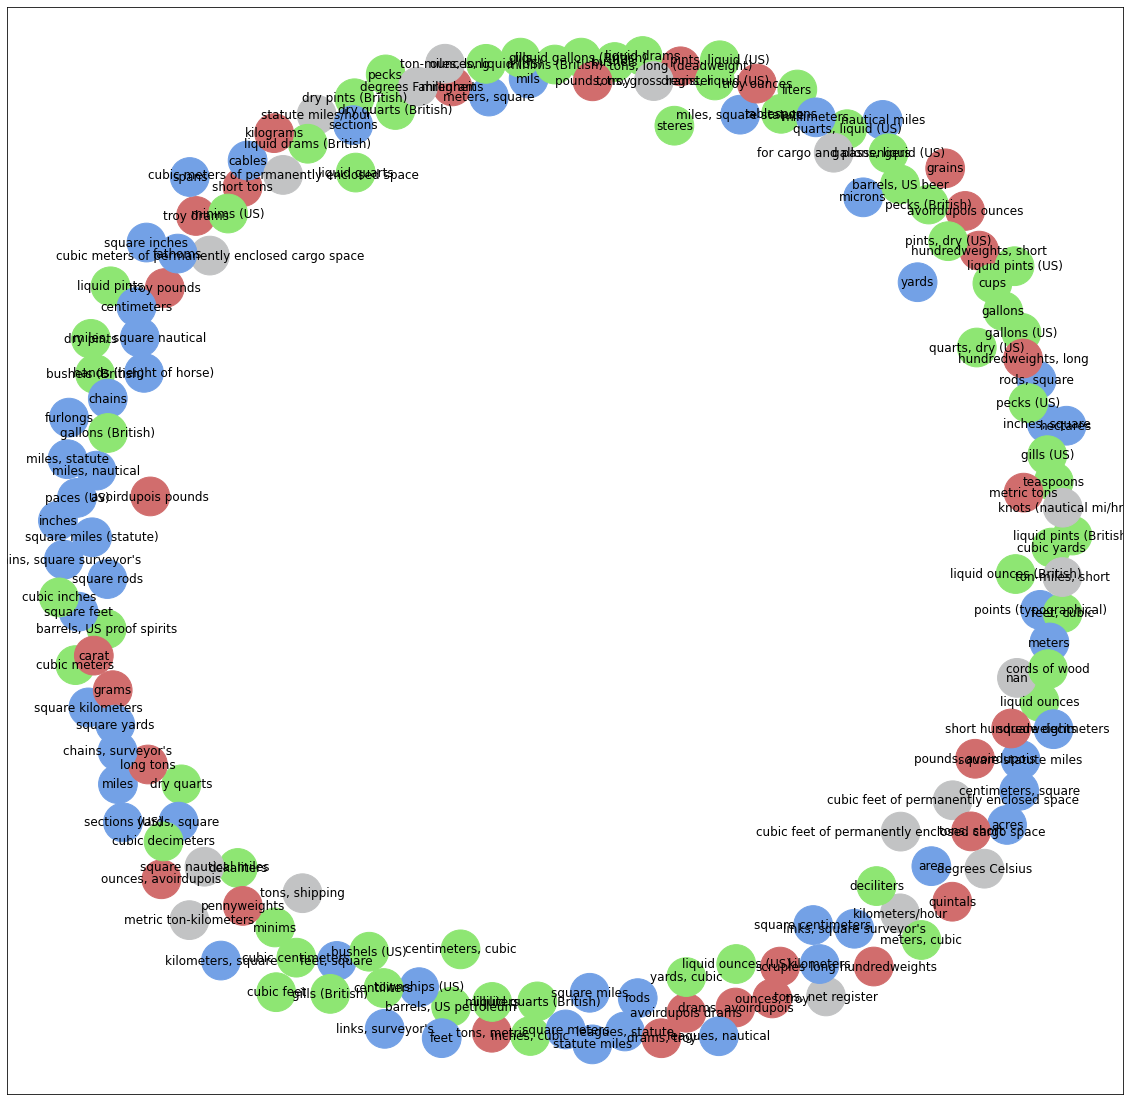

In [205]:
fig = plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = df_cc['node_color'], node_size = 1500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows = True, arrowstyle='->', width=10)

plt.show()

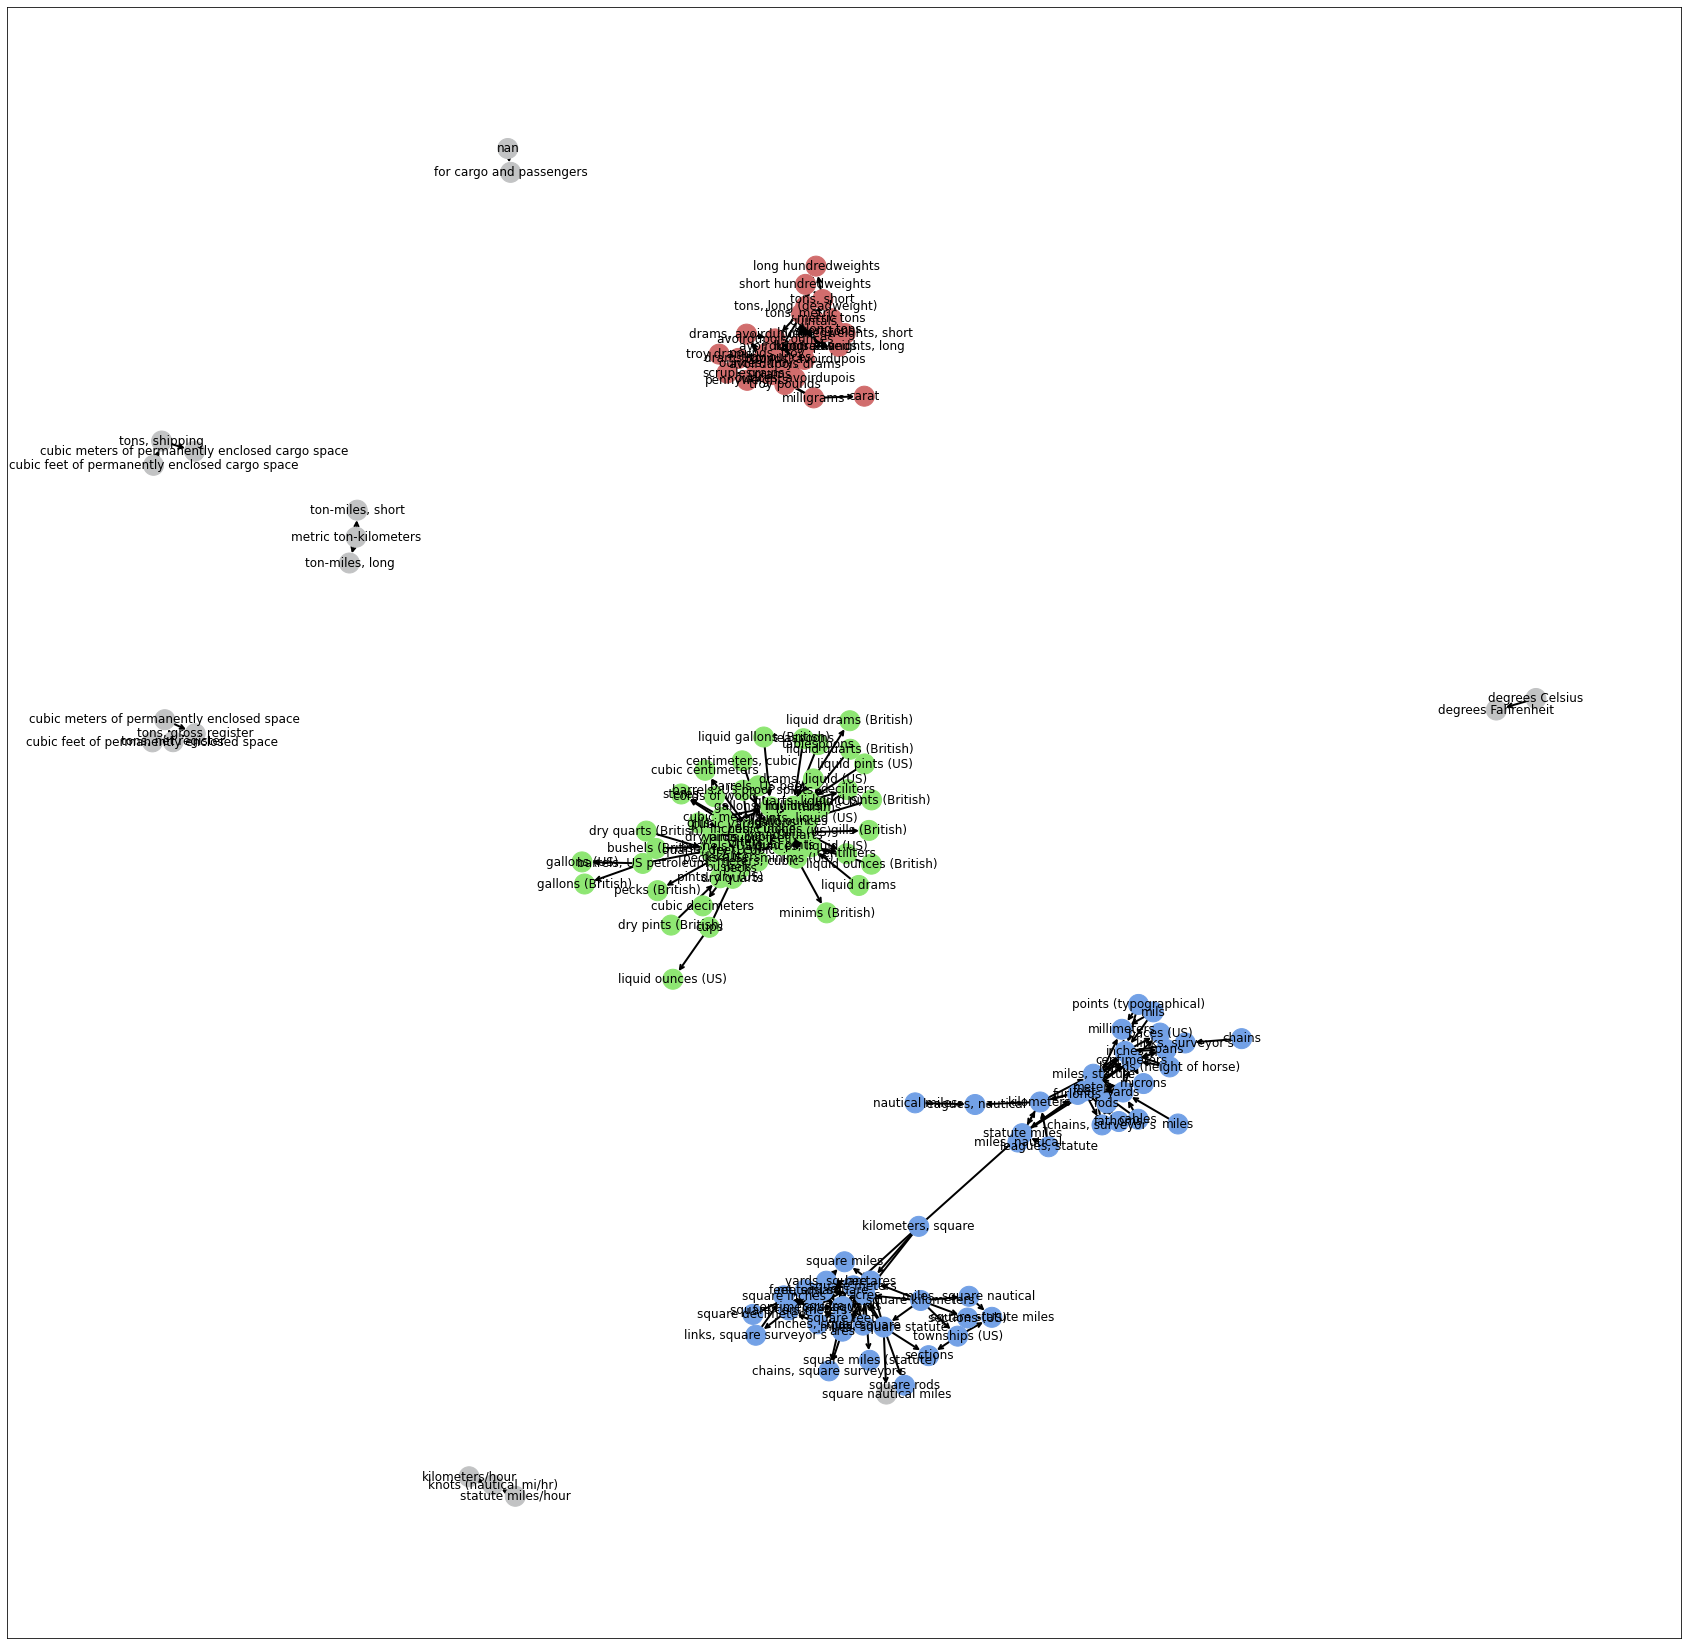

In [193]:
import networkx as nx
import matplotlib.pyplot as plt

for cc in list(set())

l1 = [[i, label] for i, label in enumerate(labels)]
l2 = []

for i, row in df.iterrows():
    row_index = labels.index(row['from'])
    col_index = labels.index(row['to'])
    l2.append([row_index, col_index])
    l2.append([col_index, row_index])

addresses = dict(l1)

g = nx.Graph()
for address in addresses.values():
    g.add_node(address)

for i1, i2 in l2:
    g.add_edge(addresses[i1], addresses[i2])

s = 30
plt.figure(figsize=(s, s))

pos = nx.fruchterman_reingold_layout(g, scale = 10)
nx.draw_networkx(g, pos = pos, node_size = 400, arrows = True, arrowstyle='->', width=2, node_color = df_cc['node_color'])


#nx.draw_networkx_nodes(g, pos, node_color = df_cc['node_color'], node_size = 1500)
#nx.draw_networkx_labels(g, pos)
#nx.draw_networkx_edges(g, pos, edge_color='black', arrows = True, arrowstyle='->', width=10, ax=ax)

plt.show()